### Importing libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
% matplotlib inline

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("C:/Users/mehta/Desktop/ADS/Presentation/creditcard.csv")
df = pd.read_csv("C:/Users/mehta/Desktop/ADS/Presentation/creditcard.csv")

### Checking for missing values

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## Analysis based on class

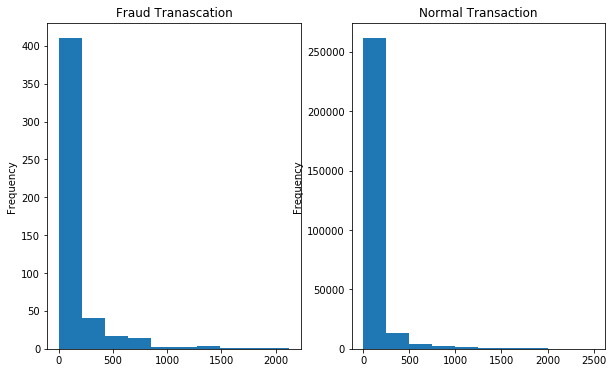

In [6]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [7]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## Plotting barplot for fraud and non-fraudulant transactions.

# Analysis based on Time

In [10]:
# As the time provided is in seconds we can use it as seconds since epoch as we won't care about years
def convert_totime(seconds):
    return datetime.datetime.utcfromtimestamp(seconds);

timeAnalysis = data[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# As the max time is 172792 seconds and 172792 / (60*60) is about 48 hrs so we only have data for 2 days so only 
# plotting data against hours make sense
timeAnalysis['hour of the day'] = timeAnalysis.datetime.dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()


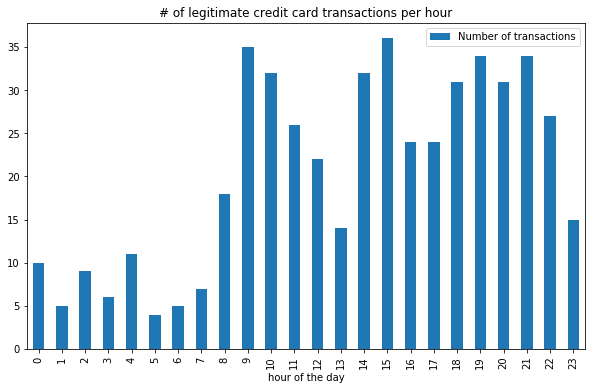

In [11]:
plt.figure(figsize =(10,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per hour', legend = True)

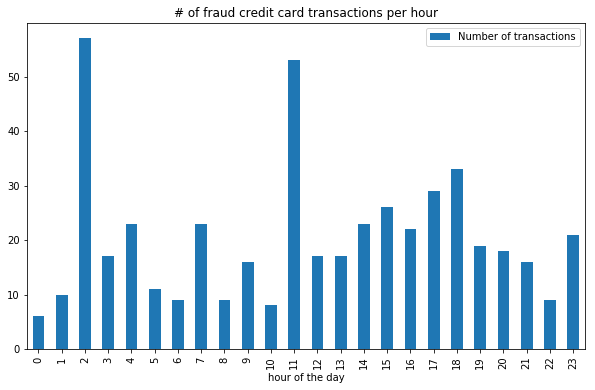

In [12]:
plt.figure(figsize = (10, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per hour', legend = True)

In [13]:
timeAnalysis['minutes'] = timeAnalysis.datetime.dt.minute
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'minutes'])['Amount'].count()

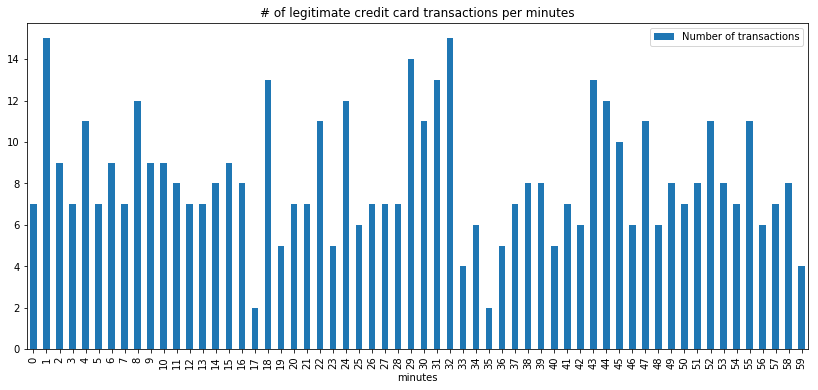

In [14]:
plt.figure(figsize =(14,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per minutes', legend = True)

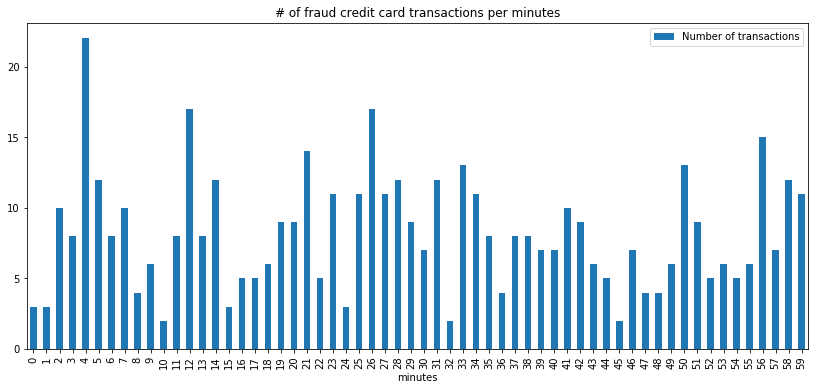

In [15]:
plt.figure(figsize = (14, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per minutes', legend = True)

In [16]:
timeAnalysis['Day'] = timeAnalysis.datetime.dt.day
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'Day'])['Amount'].count()

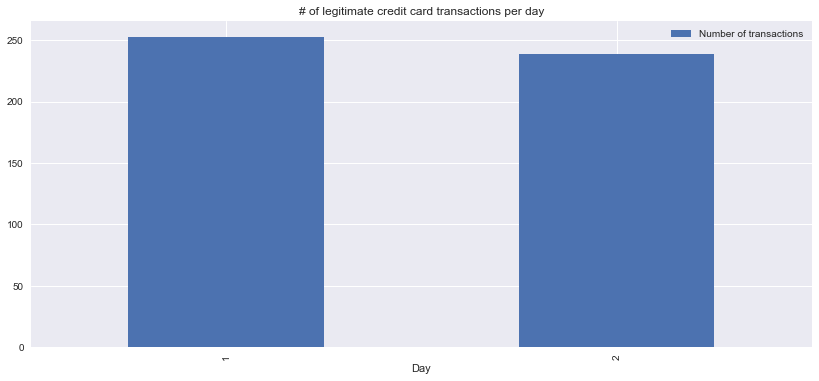

In [112]:
plt.figure(figsize =(14,6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per day', legend = True)

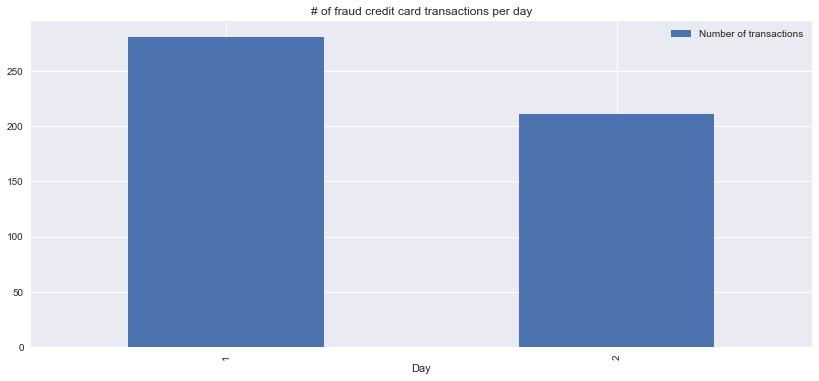

In [113]:
plt.figure(figsize = (14, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per day', legend = True)

### Outlier detection Technique

## z-score

In [114]:
#Hypothesis test

population = timeAnalysis[timeAnalysis.Class == 0].Amount
sample = timeAnalysis[timeAnalysis.Class == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

In [115]:
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

2.5503370401127636

As the z-score is more than 2.326 we reject the Null hypothesis. So there is a 99% chance that the amount spend on fraudulent transactions are on average significantly higher than normal transactions. 

In [116]:
# Gettting the PDA columns
PDA_columns = [x for x in data.columns if 'V' in x]

valid_transactions = data[data.Class == 0]
Fraud_transactions = data[data.Class == 1]
#Getting the number of rows
sample_size = Fraud_transactions.shape[0]
for col in PDA_columns:
    mean = valid_transactions[col].mean()
    std = valid_transactions[col].std()
    zScore = (Fraud_transactions[col].mean() - mean) / (std/sample_size**0.5)
    print ('Column', col, 'is', 'Significant' if abs(zScore) >= 3.37 else 'insignificant')

Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is insignificant
Column V14 is Significant
Column V15 is insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is insignificant
Column V23 is insignificant
Column V24 is Significant
Column V25 is insignificant
Column V26 is insignificant
Column V27 is Significant
Column V28 is Significant


### Plotting graph to get idea about normally distibuted data and left or right skewed distributed data which can be an anomaly

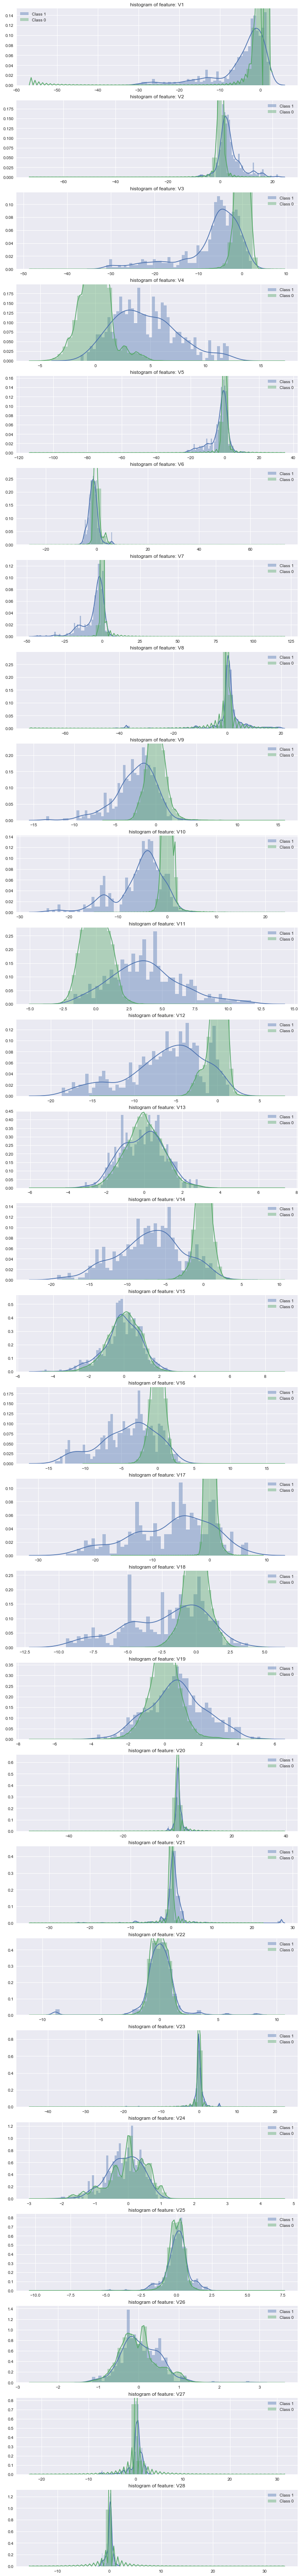

In [120]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
v_features = data.ix[:,1:29].columns
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50,label ='Class 1')
    sns.distplot(data[cn][data.Class == 0], bins=50, label = 'Class 0')
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### Removing normally distributed data as it won't affect the transaction

In [121]:
df = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

## Plotting data using box plot to get an idea about outliers present

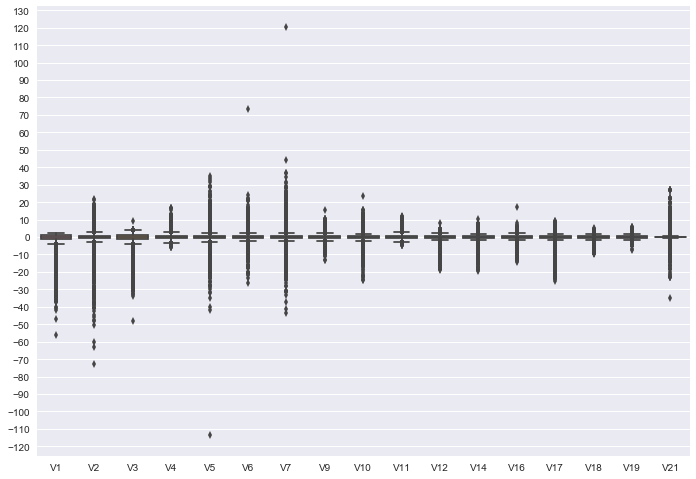

In [122]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.ticker as ticker
ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
data1 = data[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','V21']]
sns.boxplot(data=data1)

In [123]:
data.count()

Time          284807
V1            284807
V2            284807
V3            284807
V4            284807
V5            284807
V6            284807
V7            284807
V8            284807
V9            284807
V10           284807
V11           284807
V12           284807
V13           284807
V14           284807
V15           284807
V16           284807
V17           284807
V18           284807
V19           284807
V20           284807
V21           284807
V22           284807
V23           284807
V24           284807
V25           284807
V26           284807
V27           284807
V28           284807
Class         284807
normAmount    284807
dtype: int64

### Removing outliers by taking into consideration mean ad standard deviation

In [136]:
def reject_outliers(d, m=0.9):
    return d[abs(d - np.mean(d)) < m * np.std(d)]

In [137]:
filtered_d = reject_outliers(data1)

In [138]:
filtered_d.count()

V1     198177
V2     238491
V3     190914
V4     199110
V5     219229
V6     223910
V7     233987
V9     195876
V10    219417
V11    171435
V12    208494
V14    214282
V16    198849
V17    215276
V18    193500
V19    196769
V21    265524
dtype: int64

In [139]:
filtered_d['Class'] = data['Class']

### Replacing missing values with mean

In [140]:
filtered_d.fillna(filtered_d.mean(),inplace=True)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class
0,-1.359807,-0.072781,0.122564,-0.001341,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,-0.019219,0.104228,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0
2,-1.358354,-1.340163,0.122564,0.379780,-0.503198,-0.233384,0.791461,-0.030568,0.207643,0.624501,0.066084,-0.165946,0.044001,-0.060338,-0.121359,0.003127,0.247998,0
3,-0.966272,-0.185226,0.122564,-0.863291,-0.010309,-0.233384,0.237609,-0.030568,-0.054952,-0.226487,0.178228,-0.287924,0.044001,-0.684093,-0.004935,0.003127,-0.108300,0
4,-1.158233,0.877737,0.122564,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,0.038790,-0.451449,-0.237033,-0.038195,0.003127,-0.009431,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,-0.568671,-0.371407,-0.019219,0.359894,-0.137134,0.401726,-0.058133,0.068653,-0.033194,-0.208254,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.464960,-0.099254,-0.019219,-0.153826,0.167372,-0.443587,0.002821,-0.611987,-0.045575,-0.167716,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,0.024356,0.615375,-0.065995,-0.619468,0.291474,0.038790,-0.076127,-0.060338,-0.358222,0.324505,-0.019486,0
8,-0.894286,0.286157,-0.113192,-0.271526,-0.052144,-0.233384,0.370145,-0.392048,-0.410430,-0.705117,-0.110452,0.074355,-0.210077,-0.499768,0.118765,0.570328,-0.073425,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,-0.736727,-0.366846,-0.019219,0.836390,-0.443523,0.739453,-0.540980,0.476677,0.451773,-0.246914,0


In [141]:
filtered_d.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V9       0
V10      0
V11      0
V12      0
V14      0
V16      0
V17      0
V18      0
V19      0
V21      0
Class    0
dtype: int64

In [142]:
filtered_d.count()

V1       284807
V2       284807
V3       284807
V4       284807
V5       284807
V6       284807
V7       284807
V9       284807
V10      284807
V11      284807
V12      284807
V14      284807
V16      284807
V17      284807
V18      284807
V19      284807
V21      284807
Class    284807
dtype: int64

### Plotting data in box plot after removing outliers

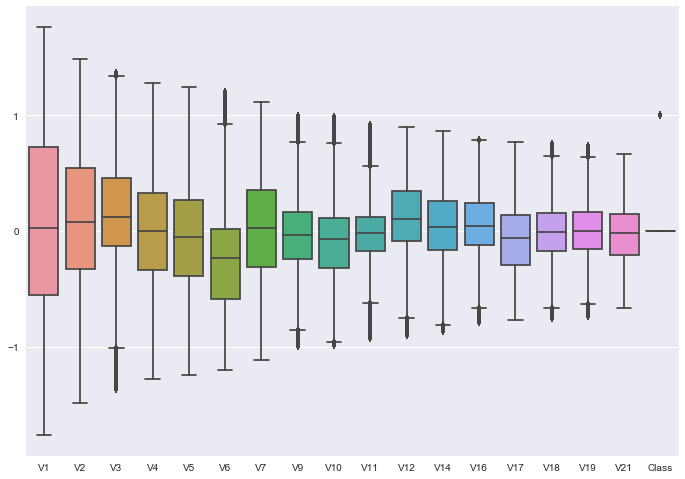

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.ticker as ticker
ax = plt.axes()

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
sns.boxplot(data = filtered_d)

In [132]:
filtered_d.count()

V1       284807
V2       284807
V3       284807
V4       284807
V5       284807
V6       284807
V7       284807
V9       284807
V10      284807
V11      284807
V12      284807
V14      284807
V16      284807
V17      284807
V18      284807
V19      284807
V21      284807
Class    284807
dtype: int64

In [144]:
filtered_d['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


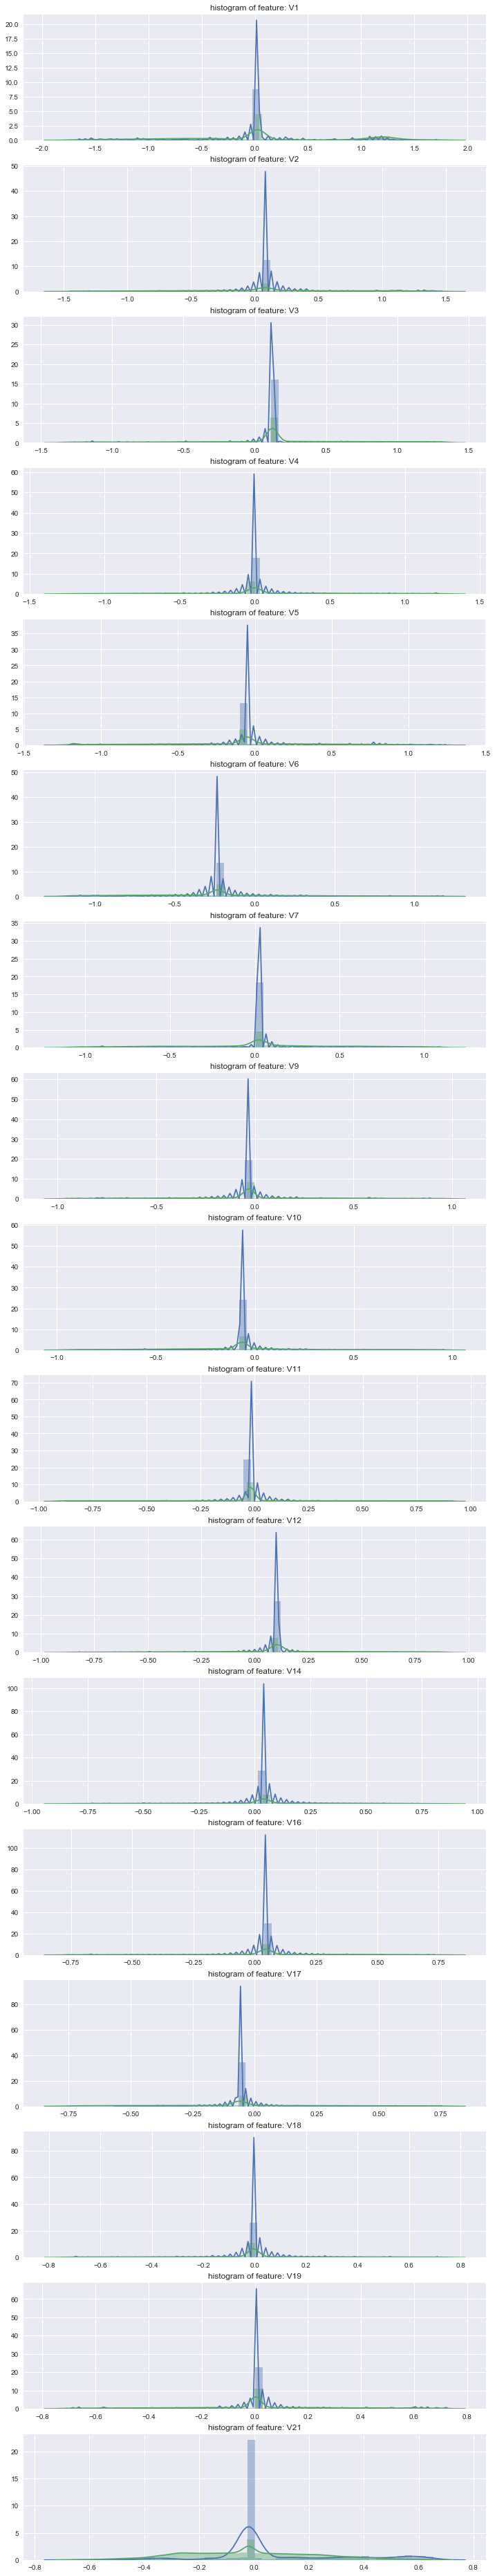

In [145]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)
v_features = filtered_d.ix[:,0:17].columns
for i, cn in enumerate(filtered_d[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(filtered_d[cn][data.Class == 1], bins=50)
    sns.distplot(filtered_d[cn][data.Class == 0], bins=50)
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### Machine Learning Algorithm

In [146]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

#mingw = 'C:\\Proimport xgboost as xgbgram Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [147]:
import xgboost as xgb

In [159]:
# First XGBoost model 
from sklearn import datasets  
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split data into X and y
X = filtered_d.iloc[:,0:16]
Y = filtered_d.iloc[:, 17]


### Implementing SMOTE 

In [203]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X, Y)

C:\Users\mehta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [204]:
np.bincount(y_res)


array([284315, 284315], dtype=int64)

In [207]:
#Split data into Train and Test
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .2,
                                                    random_state=12)

In [208]:
np.bincount(y_train_res)

array([227237, 227667], dtype=int64)

In [209]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [210]:
# make predictions for test data
y_pred = model.predict(x_val_res)
predictions = [round(value) for value in y_pred]
test = [round(value) for value in y_val_res]

In [211]:
predictions.count(0)

56743

In [212]:
predictions.count(1)

56983

### Evaluate predictions

In [213]:
accuracy = accuracy_score(y_val_res, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.59%


### Evaluating prediction accuracy for normal transaction 

In [214]:
test.count(0)/predictions.count(0)*100

100.59038119239378

### Evaluating prediction accuracy for fraud transaction 

In [215]:
test.count(1)/predictions.count(1)*100

99.4121053647579